In [1]:
import sys
sys.path.append('../nemo-eva/src/')
import numpy

In [49]:
import os
os.environ['DATA_PATH'] = '../../FE_FB_Torus_with_mixed/'

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 100)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
in_df = pd.read_csv('../../nemo-eva/data-paper/3-cleaned_features/results.csv')

in_df = in_df.loc[in_df.Model == 'real-world']

in_df = in_df.sort_values('Nodes')
in_df.loc[in_df.Graph == 'ia-reality', ['Graph', 'Model', 'Nodes']].head(10)

,Graph,Model,Nodes
1133,ia-reality,real-world,6809


In [5]:
in_df.Type.value_counts()

socfb    110
soc       33
web       17
ia        14
ca        12
tech       8
rec        8
bio        6
bn         4
inf        4
rt         3
Name: Type, dtype: int64

In [6]:
in_df_mini = in_df.loc[:, ['Graph', 'Model', 'Type', 'Nodes', 'Info']]


In [7]:
in_df = in_df.loc[~in_df.Graph.isin(['bn-human-BNU_1_0025889_session_2', 'bn-human-BNU_1_0025873_session_1-bg'])]

In [8]:
max_number_of_nodes = 100000
in_df_mini.loc[in_df_mini.Nodes < max_number_of_nodes].sort_values('Nodes').shape
in_df_mini.loc[in_df_mini.Nodes < max_number_of_nodes].sort_values('Nodes')

(181, 5)

,Graph,Model,Type,Nodes,Info
725,ia-enron-only,real-world,ia,143,no info
827,bn-macaque-rhesus_brain_1,real-world,bn,242,no info
59,inf-USAir97,real-world,inf,332,no info
395,ca-netscience,real-world,ca,379,no info
215,ia-infect-dublin,real-world,ia,410,no info
...,...,...,...,...,...
275,ia-enron-email-dynamic,real-world,ia,84384,no info
23,rec-amazon,real-world,rec,91813,no info
1079,bn-human-BNU_1_0025873_session_1-bg,real-world,bn,92043,no info
683,ia-wiki-Talk,real-world,ia,92117,no info


In [8]:
in_df_mini.loc[(in_df_mini.Nodes < max_number_of_nodes) & (in_df_mini.Type == 'bn')]

,Graph,Model,Type,Nodes,Info
827,bn-macaque-rhesus_brain_1,real-world,bn,242,no info
923,bn-fly-drosophila_medulla_1,real-world,bn,1770,no info
611,bn-human-BNU_1_0025889_session_2,real-world,bn,11382,no info
1079,bn-human-BNU_1_0025873_session_1-bg,real-world,bn,92043,no info


In [50]:
df = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')
df_mini = df.loc[:, ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'Info']]


In [51]:
df.groupby('Model').count()

,Centrality.Betweenness.Binning.Number CDF,Centrality.Betweenness.Binning.Number Histogram,Centrality.Betweenness.Dispersion.Coefficient Of Variation,Centrality.Betweenness.Dispersion.Coefficient Of Variation (Rank),Centrality.Betweenness.Dispersion.Interquartile Range,Centrality.Betweenness.Dispersion.Sample Range,Centrality.Betweenness.Dispersion.Standard Deviation,Centrality.Betweenness.Dispersion.Standard Deviation (Rank),Centrality.Betweenness.Dispersion.Uncorrected Coefficient Of Variation,Centrality.Betweenness.Dispersion.Uncorrected Coefficient Of Variation (Rank),...,Partition.CoreDecomposition.Location.Min,Partition.CoreDecomposition.Location.Quadratic Mean,Partition.CoreDecomposition.Properties.Bessel's Correction,Partition.CoreDecomposition.Properties.Size,Partition.CoreDecomposition.Shape.Kurtosis,Partition.CoreDecomposition.Shape.Skewness M,Partition.CoreDecomposition.Shape.Skewness YP,Self Loops,Type,Weighted
Model,,,,,,,,,,,,,,,,,,,,,
1-2-34-mixed-girg,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
1-23-mixed-girg,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
1-234-mixed-girg,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
12-34-mixed-girg,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
1d-copyweight-girg,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
1d-cube-girg,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110
1d-girg,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110
1d-min-girg,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108
2d-copyweight-girg,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107


In [41]:
a = set(df.loc[df.Model == '5d-copyweight-girg', 'Graph'].values)
b = set([x['Name'] for x in graph_dicts])

In [42]:
a - b
b - a

set()

{'socfb-OR', 'socfb-Penn94', 'socfb-Texas84', 'socfb-UF', 'socfb-wosn-friends'}

In [33]:
df.loc[df.Graph == 'socfb-OR', ['Graph', 'Nodes']]

,Graph,Nodes
899,socfb-OR,63392


In [31]:
import glob

data_dir = '/Users/benjidayan/Documents/GIRG_data/'
results_csv = '../../nemo-eva/data-paper/3-cleaned_features/results.csv'
df = pd.read_csv(results_csv)

df = df.loc[df.Model == 'real-world']

socfb_graphs = df.loc[df.Model == 'real-world'].loc[df.Type == 'socfb'].sort_values('Nodes')


graph_name_group_pairs = socfb_graphs[['Graph', 'Type']].to_numpy()
graph_dicts = []
for graph_name, group in graph_name_group_pairs:
    fn = glob.glob(data_dir + graph_name + '.*')[0]
    print(fn)
    # TODO remove? socfg-nips-ego has avg deg 2.0 which is very small, and for some reason
    # makes GIRG finding much slower
    if graph_name == 'socfb-nips-ego':
        continue
    graph_dict = {"Group": group, "FullPath": fn, "Name": graph_name}
    graph_dicts.append(graph_dict)


/Users/benjidayan/Documents/GIRG_data/socfb-Caltech36.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Reed98.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Haverford76.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Simmons81.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Swarthmore42.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Amherst41.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Bowdoin47.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Hamilton46.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Trinity100.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-USFCA72.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Williams40.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-nips-ego.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Oberlin44.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Wellesley22.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Smith60.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Vassar85.

In [35]:
def quick_mixin(my_list, end_per_begin=5):
    """[1,2,3,4,5,6,7,8,9,10], 3 -> [1,2,10,3,4,9,5,6,8,7] roughly"""
    i = 0
    j = len(my_list)-1
    out = []
    end_went = False
    while i < j:
        if i % (end_per_begin-1) == 0 and not end_went:
            out.append(my_list[j])
            j -= 1
            end_went = True
        else:
            out.append(my_list[i])
            i += 1
            end_went = False

    out.append(my_list[i])
    return out


# TODO put back in?
graph_dicts = quick_mixin(graph_dicts, end_per_begin=5)


In [36]:
graph_dicts[-10:]

[{'Group': 'socfb',
  'FullPath': '/Users/benjidayan/Documents/GIRG_data/socfb-UConn.SpaceOne',
  'Name': 'socfb-UConn'},
 {'Group': 'socfb',
  'FullPath': '/Users/benjidayan/Documents/GIRG_data/socfb-Maryland58.SpaceOne',
  'Name': 'socfb-Maryland58'},
 {'Group': 'socfb',
  'FullPath': '/Users/benjidayan/Documents/GIRG_data/socfb-Oklahoma97.SpaceOne',
  'Name': 'socfb-Oklahoma97'},
 {'Group': 'socfb',
  'FullPath': '/Users/benjidayan/Documents/GIRG_data/socfb-USC35.SpaceOne',
  'Name': 'socfb-USC35'},
 {'Group': 'socfb',
  'FullPath': '/Users/benjidayan/Documents/GIRG_data/socfb-UNC28.SpaceOne',
  'Name': 'socfb-UNC28'},
 {'Group': 'socfb',
  'FullPath': '/Users/benjidayan/Documents/GIRG_data/socfb-Auburn71.SpaceOne',
  'Name': 'socfb-Auburn71'},
 {'Group': 'socfb',
  'FullPath': '/Users/benjidayan/Documents/GIRG_data/socfb-UCLA26.SpaceOne',
  'Name': 'socfb-UCLA26'},
 {'Group': 'socfb',
  'FullPath': '/Users/benjidayan/Documents/GIRG_data/socfb-Cornell5.SpaceOne',
  'Name': 'socfb-Co

In [13]:
import numpy as np
df = df.drop(labels=np.argwhere((df.Model == '3d-cube-girg').values).reshape(-1), axis=0)

In [14]:
df.Info = df.Info.apply(lambda temp: {key: var for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

In [15]:
df_mini.sort_values('Nodes').tail(30)

,Graph,Model,Type,Nodes,Edges,Info
357,socfb-UF21,1d-min-girg,socfb,35111,1453722,tau=4.918454781144023|alpha=1.3219043684808427...
441,socfb-UF21,2d-min-girg,socfb,35111,1430556,tau=4.918454781144023|alpha=1.857764876632801|...
551,socfb-UF,4d-min-girg,socfb,35111,1414580,tau=4.918454781144023|alpha=100.0|const=3.8916...
554,socfb-UF21,4d-min-girg,socfb,35111,1414412,tau=4.918454781144023|alpha=100.0|const=3.8754...
666,socfb-UF21,1-2-34-mixed-girg,socfb,35111,1432786,tau=4.918454781144023|alpha=1.857764876632801|...
581,socfb-UF21,5d-min-girg,socfb,35111,1497961,tau=4.918454781144023|alpha=100.0|const=1.9431...
578,socfb-UF,5d-min-girg,socfb,35111,1496877,tau=4.918454781144023|alpha=100.0|const=1.9400...
342,socfb-UF,1d-min-girg,socfb,35111,1450258,tau=4.918454781144023|alpha=1.3219043684808427...
437,socfb-Texas84,2d-min-girg,socfb,36364,1559033,tau=4.774843344808111|alpha=1.678688524590164|...
777,socfb-Texas84,1-234-mixed-girg,socfb,36364,1578405,tau=4.774843344808111|alpha=1.2643224022125643...


In [102]:
def is_bad(x):
    a, b = x.loc[x.Model == 'real-world', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].values, x.loc[x.Model == '1d-girg', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].values
    return (np.log(b/a)**2 > 0.3)[0]
bad_graphs = df_clean.groupby('Graph').apply(is_bad)
bad_graphs[bad_graphs == True]

Graph
bio-dmela                       True
ia-enron-email-dynamic          True
ia-escorts-dynamic              True
ia-fb-messages                  True
ia-reality                      True
ia-wiki-Talk                    True
inf-euroroad                    True
rec-movielens-tag-movies-10m    True
socfb-nips-ego                  True
tech-p2p-gnutella               True
dtype: bool

In [52]:
import feature_cleaner
import imp
imp.reload(feature_cleaner)

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_66850/585130793.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'feature_cleaner' from '/Users/benjidayan/GDrive/eth_courses/GIRG/nemo-eva/src/feature_cleaner.py'>

In [53]:
graph_dicts = df.to_dict('records')
fc = feature_cleaner.FeatureCleaner(graph_dicts)

In [54]:
fc.resultspath

'../../FE_FB_Torus_with_mixed/3-cleaned_features/results.csv'

In [55]:
fc.execute()

Feature: 296 ( unfiltered: 346 )
missing graphs for 1-234-mixed-girg model: {'socfb-wosn-friends', 'socfb-nips-ego', 'socfb-OR'}
missing graphs for 1d-copyweight-girg model: {'socfb-wosn-friends', 'socfb-nips-ego', 'socfb-OR'}
missing graphs for 1-23-mixed-girg model: {'socfb-wosn-friends', 'socfb-nips-ego', 'socfb-OR'}
missing graphs for 12-34-mixed-girg model: {'socfb-wosn-friends', 'socfb-nips-ego', 'socfb-OR'}
missing graphs for 4d-copyweight-girg model: {'socfb-nips-ego', 'socfb-OR', 'socfb-wosn-friends', 'socfb-Texas84', 'socfb-Penn94'}
missing graphs for 7d-girg model: {'socfb-nips-ego'}
missing graphs for 3d-copyweight-girg model: {'socfb-wosn-friends', 'socfb-nips-ego', 'socfb-OR', 'socfb-Penn94'}
missing graphs for 6d-girg model: {'socfb-nips-ego'}
missing graphs for 4d-min-girg model: {'socfb-wosn-friends', 'socfb-nips-ego'}
missing graphs for 5d-min-girg model: {'socfb-wosn-friends', 'socfb-nips-ego', 'socfb-OR'}
missing graphs for 3d-min-girg model: {'socfb-wosn-friends', 

/Users/benjidayan/GDrive/eth_courses/GIRG/nemo-eva/src/feature_cleaner.py:47: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_real = df_real.loc[complete_graphs]
/Users/benjidayan/GDrive/eth_courses/GIRG/nemo-eva/src/feature_cleaner.py:48: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_cleaned = df_features_cleaned.loc[complete_graphs]
/Users/benjidayan/GDrive/eth_courses/GIRG/nemo-eva/src/feature_cleaner.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Graph"] = df_final.index


In [135]:
df.loc[df.Graph == 'bn-human-BNU_1_0025873_session_1-bg', ['Graph', 'Model', 'Nodes', 'Info', 'Centrality.Degree.Location.Arithmetic Mean']]

,Graph,Model,Nodes,Info,Centrality.Degree.Location.Arithmetic Mean
661,bn-human-BNU_1_0025873_session_1-bg,real-world,602353,NaN,494.991751


In [26]:
os.environ['DATA_PATH'] + '3-cleaned_features/results.csv' == fc.resultspath

True

In [56]:
df_clean = pd.read_csv(os.environ['DATA_PATH'] + '3-cleaned_features/results.csv')
df_clean.Info = df_clean.Info.apply(lambda temp: {'Info': temp} if '|' not in temp else {key: var for key, var in [x.split('=') for x in temp.split('|')]})
df_real = df_clean.loc[df_clean.Model == 'real-world']
df_clean['alpha'] = df_clean.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

In [57]:
df_clean.shape

(3120, 274)

In [196]:
df_clean.loc[:, 'Centrality.Degree.Location.Arithmetic Mean (Rank)']

0       1125.5
1       1125.5
2       1125.5
3       1125.5
4       1118.0
         ...  
1205    1307.0
1206    1307.0
1207    1307.0
1208    1307.0
1209    1307.0
Name: Centrality.Degree.Location.Arithmetic Mean (Rank), Length: 1210, dtype: float64

In [58]:
df_clean.loc[:, ['Graph', 'Model', 'Nodes', 'Info', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean']]

,Graph,Model,Nodes,Info,alpha,Centrality.ClusteringCoefficient.Location.Arithmetic Mean
0,socfb-WashU32,real-world,7730,{'Info': 'no info'},None,0.261745
1,socfb-WashU32,ER,7730,{'Info': 'no info'},None,0.012374
2,socfb-WashU32,BA circle,7730,{'Info': 'no info'},None,0.039835
3,socfb-WashU32,BA full,7730,{'Info': 'no info'},None,0.043419
4,socfb-WashU32,chung-lu,7639,{'Info': 'no info'},None,0.038739
...,...,...,...,...,...,...
3115,socfb-Syracuse56,1d-copyweight-girg,13626,"{'tau': '5.931959855142892', 'alpha': '1.12300...",1.1230040357957538,0.238212
3116,socfb-Syracuse56,2d-copyweight-girg,13540,"{'tau': '5.931959855142892', 'alpha': '1.18408...",1.1840888066604995,0.239056
3117,socfb-Syracuse56,3d-copyweight-girg,13516,"{'tau': '5.931959855142892', 'alpha': '1.23444...",1.2344488378821488,0.237635
3118,socfb-Syracuse56,4d-copyweight-girg,13528,"{'tau': '5.931959855142892', 'alpha': '1.32862...",1.328627776624455,0.241296


In [214]:
df_clean.loc[df_clean.Graph == 'socfb-nips-ego', ['Graph', 'Model', 'Nodes', 'Info', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean']]

,Graph,Model,Nodes,Info,alpha,Centrality.ClusteringCoefficient.Location.Arithmetic Mean
756,socfb-nips-ego,real-world,2888,{'Info': 'no info'},None,0.027247
757,socfb-nips-ego,ER,2404,{'Info': 'no info'},None,0.000852
758,socfb-nips-ego,BA circle,2888,{'Info': 'no info'},None,0.000000
759,socfb-nips-ego,BA full,2888,{'Info': 'no info'},None,0.000867
760,socfb-nips-ego,chung-lu,1623,{'Info': 'no info'},None,0.145633
761,socfb-nips-ego,hyperbolic,20,"{'n': '8386', 'k': '0.7110316040548599', 'gamm...",1.243201,0.041667
762,socfb-nips-ego,1d-girg,1739,"{'tau': '2.1', 'alpha': '1.0101010101010102', ...",1.0101010101010102,0.112111
763,socfb-nips-ego,2d-girg,1682,"{'tau': '2.1', 'alpha': '1.0101010101010102', ...",1.0101010101010102,0.108545
764,socfb-nips-ego,3d-girg,1767,"{'tau': '2.1', 'alpha': '1.0101010101010102', ...",1.0101010101010102,0.079276
765,socfb-nips-ego,4d-girg,1782,"{'tau': '2.1', 'alpha': '1.0101010101010102', ...",1.0101010101010102,0.072563


In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 500x500 with 0 Axes>

(-0.025, 0.025)

(-0.025, 0.025)

Text(0.5, 0, 'realworld vs 1dgirg log(post/pre)')

Text(0, 0.5, 'realworld vs 3dgirg log(post/pre)')

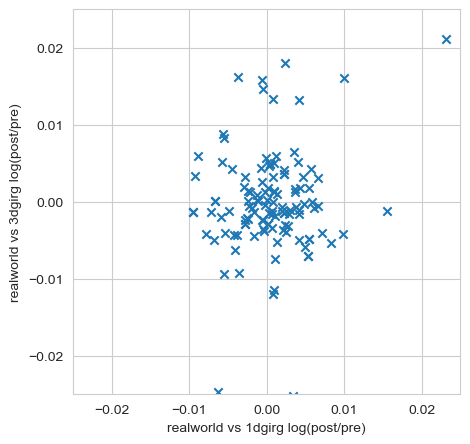

In [174]:
df_clean = df_clean.sort_values(['Graph', 'Model'])
pre, post = df_clean.loc[df_clean.Model == 'real-world', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].values, df_clean.loc[df_clean.Model == '1d-girg', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].values

post2 = df_clean.loc[df_clean.Model == '3d-girg', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].values
a = np.log(post/pre)
b = np.log(post2/pre)
plt.figure(figsize=(5,5))
plt.scatter(a, b, marker='x')
plt.xlim(-0.025, 0.025)
plt.ylim(-0.025, 0.025)
plt.xlabel('realworld vs 1dgirg log(post/pre)')
plt.ylabel('realworld vs 3dgirg log(post/pre)')
# sns.swarmplot(np.log(post/pre))
# sns.swarmplot(np.log(post/pre))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

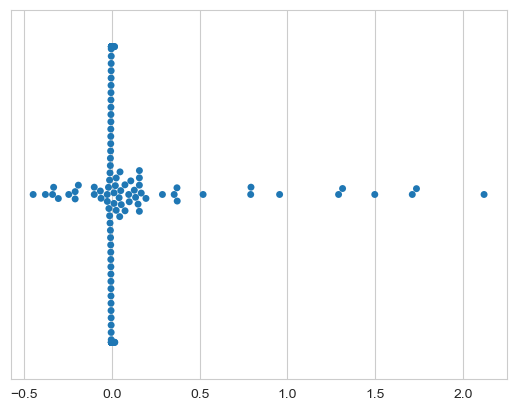

In [167]:
pre, post = df_clean.loc[df_clean.Model == 'real-world', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].values, df_clean.loc[df_clean.Model == '3d-girg', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].values

sns.swarmplot(np.log(post/pre))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

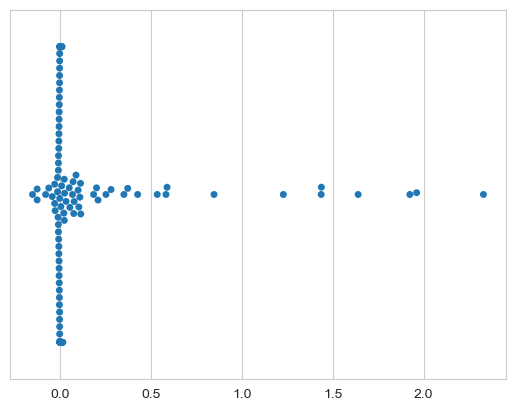

In [169]:
pre, post = df_clean.loc[df_clean.Model == 'real-world', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].values, df_clean.loc[df_clean.Model == '1d-girg', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].values

sns.swarmplot(np.log(post/pre))

In [25]:
missing = ['soc-themarker', 'socfb-Vanderbilt48', 'ia-wikiquote-user-edits', 'bn-human-BNU_1_0025873_session_1-bg', 'socfb-Brown11', 'socfb-OR', 'socfb-Yale4', 'tech-p2p-gnutella', 'socfb-UCSC68', 'socfb-wosn-friends', 'ia-wiki-Talk', 'ia-enron-email-dynamic', 'soc-slashdot', 'socfb-Georgetown15', 'socfb-Maine59']
present = list(df_real.loc[:, 'Graph'])
present

['socfb-Wake73',
 'ia-email-univ',
 'socfb-Reed98',
 'socfb-Bucknell39',
 'bn-macaque-rhesus_brain_1',
 'tech-routers-rf',
 'socfb-Williams40',
 'socfb-Middlebury45',
 'bio-diseasome',
 'socfb-Wesleyan43',
 'soc-Slashdot0811',
 'bio-yeast',
 'soc-slashdot-trust-all',
 'socfb-CMU',
 'socfb-Rice31',
 'socfb-JohnsHopkins55',
 'socfb-Tulane29',
 'bio-dmela',
 'rt-twitter-copen',
 'bio-yeast-protein-inter',
 'socfb-Emory27',
 'socfb-MIT',
 'socfb-Dartmouth6',
 'socfb-Simmons81',
 'socfb-Amherst41',
 'ia-fb-messages',
 'soc-slashdot-zoo',
 'socfb-Mich67',
 'socfb-Trinity100',
 'socfb-Wellesley22',
 'rec-amazon',
 'ca-netscience',
 'socfb-Bowdoin47',
 'socfb-Lehigh96',
 'socfb-WashU32',
 'socfb-Vermont70',
 'web-spam',
 'socfb-Smith60',
 'socfb-UChicago30',
 'socfb-William77',
 'socfb-Howard90',
 'socfb-Carnegie49',
 'socfb-Villanova62',
 'ca-GrQc',
 'socfb-American75',
 'inf-power',
 'soc-Slashdot0902',
 'bn-fly-drosophila_medulla_1',
 'web-EPA',
 'bio-celegans',
 'socfb-Hamilton46',
 'socfb

In [35]:
os.listdir(data_dir)

['socfb-NYU9.SpaceOne',
 'socfb-Middlebury45.SpaceOne',
 'socfb-Bucknell39.SpaceOne',
 'soc-hamsterster.SpaceOne',
 'soc-gplus.SpaceOne',
 'ca-Erdos992.SpaceOne',
 'web-sk-2005.SpaceOne',
 'soc-slashdot.SpaceOne',
 'socfb-William77.SpaceOne',
 'socfb-UMass92.SpaceOne',
 'soc-Slashdot0811.SpaceOne',
 'socfb-UCSC68.SpaceOne',
 'socfb-UF.SpaceOne',
 'socfb-UC64.SpaceOne',
 'socfb-Vassar85.SpaceOne',
 'socfb-Oberlin44.SpaceOne',
 'soc-gowalla.SpaceOne',
 'soc-slashdot-zoo.SpaceOne',
 'socfb-Maryland58.SpaceOne',
 'tech-WHOIS.SpaceOne',
 'socfb-Texas84.SpaceOne',
 'soc-sign-Slashdot090216.SpaceOne',
 'socfb-Dartmouth6.SpaceOne',
 'rec-eachmovie.SpaceOne',
 'tech-p2p-gnutella.SpaceOne',
 'socfb-BU10.SpaceOne',
 'soc-brightkite.SpaceOne',
 'tech-as-skitter.SpaceOne',
 'soc-sign-Slashdot081106.SpaceOne',
 'rec-movielens-user-movies-10m.SpaceOne',
 'ia-reality.SpaceOne',
 'socfb-Pepperdine86.SpaceOne',
 'bn-human-BNU_1_0025889_session_2.SpaceOne',
 'socfb-Emory27.SpaceOne',
 'socfb-Rutgers89.Sp

In [36]:
import glob
data_dir = '/Users/benjidayan/Documents/GIRG_data/'
max_number_of_nodes = 100000


# array([['ia-enron-only', 'ia'],
#        ['bn-macaque-rhesus_brain_1', 'bn'],
#        ['inf-USAir97', 'inf'],
# ....
graph_name_group_pairs = in_df_mini[['Graph', 'Type']].to_numpy()
graph_dicts = []
for graph_name, group in graph_name_group_pairs:
    fn = glob.glob(data_dir + graph_name + '.*')[0]
    print(fn)
    graph_dict = {"Group": group, "FullPath": fn, "Name": graph_name}
    graph_dicts.append(graph_dict)

def quick_mixin(my_list, end_per_begin=5):
    """[1,2,3,4,5,6,7,8,9,10], 3 -> [1,2,10,3,4,9,5,6,8,7] roughly"""
    i = 0
    j = len(my_list)-1
    out = []
    end_went = False
    while i < j:
        if i % (end_per_begin-1) == 0 and not end_went:
            out.append(my_list[j])
            j -= 1
            end_went = True
        else:
            out.append(my_list[i])
            i += 1
            end_went = False

    out.append(my_list[i])
    return out


graph_dicts = quick_mixin(graph_dicts, end_per_begin=6)


/Users/benjidayan/Documents/GIRG_data/ia-enron-only.SpaceOne
/Users/benjidayan/Documents/GIRG_data/bn-macaque-rhesus_brain_1.SpaceOne
/Users/benjidayan/Documents/GIRG_data/inf-USAir97.SpaceOne
/Users/benjidayan/Documents/GIRG_data/ca-netscience.SpaceOne
/Users/benjidayan/Documents/GIRG_data/ia-infect-dublin.SpaceOne
/Users/benjidayan/Documents/GIRG_data/bio-celegans.SpaceOne
/Users/benjidayan/Documents/GIRG_data/bio-celegans-dir.SpaceOne
/Users/benjidayan/Documents/GIRG_data/bio-diseasome.SpaceOne
/Users/benjidayan/Documents/GIRG_data/web-polblogs.SpaceOne
/Users/benjidayan/Documents/GIRG_data/rt-twitter-copen.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Caltech36.SpaceOne
/Users/benjidayan/Documents/GIRG_data/soc-wiki-Vote.SpaceOne
/Users/benjidayan/Documents/GIRG_data/socfb-Reed98.SpaceOne
/Users/benjidayan/Documents/GIRG_data/inf-euroroad.SpaceOne
/Users/benjidayan/Documents/GIRG_data/ia-email-univ.SpaceOne
/Users/benjidayan/Documents/GIRG_data/ia-fb-messages.SpaceOne
/Users

In [37]:
names = [x['Name'] for x in graph_dicts]
idxs = [names.index(x) for x in names if x not in present]
idxs = sorted(idxs)
idxs

[0,
 3,
 6,
 12,
 18,
 24,
 30,
 36,
 42,
 48,
 54,
 60,
 65,
 66,
 72,
 78,
 84,
 90,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 208,
 209,
 210,
 212,
 214,
 215,
 216,
 217,
 218]

In [39]:
in_df_mini.iloc[idxs]

,Graph,Model,Type,Nodes,Info
725,ia-enron-only,real-world,ia,143,no info
395,ca-netscience,real-world,ca,379,no info
1283,bio-celegans-dir,real-world,bio,453,no info
605,socfb-Reed98,real-world,socfb,962,no info
185,bio-yeast,real-world,bio,1458,no info
...,...,...,...,...,...
83,web-BerkStan-dir,real-world,web,654782,no info
143,web-google-dir,real-world,web,855802,no info
179,ca-IMDB,real-world,ca,896305,no info
1313,rt-retweet-crawl,real-world,rt,1112702,no info


In [42]:
df.loc[df.Graph == 'ia-enron-early']

,Centrality.Betweenness.Binning.Number CDF,Centrality.Betweenness.Binning.Number Histogram,Centrality.Betweenness.Dispersion.Coefficient Of Variation,Centrality.Betweenness.Dispersion.Coefficient Of Variation (Rank),Centrality.Betweenness.Dispersion.Interquartile Range,Centrality.Betweenness.Dispersion.Sample Range,Centrality.Betweenness.Dispersion.Standard Deviation,Centrality.Betweenness.Dispersion.Standard Deviation (Rank),Centrality.Betweenness.Dispersion.Uncorrected Coefficient Of Variation,Centrality.Betweenness.Dispersion.Uncorrected Coefficient Of Variation (Rank),...,Partition.CoreDecomposition.Location.Min,Partition.CoreDecomposition.Location.Quadratic Mean,Partition.CoreDecomposition.Properties.Bessel's Correction,Partition.CoreDecomposition.Properties.Size,Partition.CoreDecomposition.Shape.Kurtosis,Partition.CoreDecomposition.Shape.Skewness M,Partition.CoreDecomposition.Shape.Skewness YP,Self Loops,Type,Weighted


In [63]:
df_clean.loc[:, ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean', 'Centrality.Degree.Location.Arithmetic Mean']].sort_values(['Graph', 'Model'])

,Graph,Model,Type,Nodes,Edges,alpha,Centrality.ClusteringCoefficient.Location.Arithmetic Mean,Centrality.Degree.Location.Arithmetic Mean
1164,bio-celegans,1d-cube-girg,bio,444,1649,2.33784616789571,0.606983,7.427928
1161,bio-celegans,1d-girg,bio,453,2096,2.4190309702109567,0.627487,9.253863
1165,bio-celegans,2d-cube-girg,bio,435,1637,2.0,0.550821,7.526437
1162,bio-celegans,2d-girg,bio,450,2045,3.460511642053326,0.670343,9.088889
1163,bio-celegans,3d-girg,bio,453,2035,100.0,0.525261,8.984547
...,...,...,...,...,...,...,...,...
1191,web-webbase-2001,BA full,web,16062,25593,None,0.001381,3.186776
1189,web-webbase-2001,ER,web,15340,25625,None,0.000194,3.340939
1192,web-webbase-2001,chung-lu,web,11704,25084,None,0.036669,4.286398
1193,web-webbase-2001,hyperbolic,web,14096,19802,1.795735,0.223127,2.809591


In [65]:
i = 1132
print(df_clean.iloc[i].Nodes)
df_clean.iloc[i].Info


17828


{'tau': '4.49577559644138',
 'alpha': '83.9344262295082',
 'const': '3.999271392822266',
 'target_lcc': '0.6328232091518612',
 'fit_lcc': '0.6058653909230828',
 'fitting_time': '1196.9207427501678',
 'hist': '[(2.0, 0.43272513079338915), (3.9215686274509802, 0.567407030518778), (7.547169811320754, 0.5958440428223724), (14.035087719298245, 0.6026214759704791), (24.615384615384613, 0.6047555580818434), (39.50617283950617, 0.6053000804223438), (56.637168141592916, 0.6059030023776318), (72.31638418079096, 0.6053872079918319), (83.9344262295082, 0.6071038061953791), (91.2655971479501, 0.6059939548518191), (83.9344262295082, 0.6071038061953791)]'}

In [66]:
i = 1131
print(df_clean.iloc[i].Nodes)
df_clean.iloc[i].Info


18103


{'tau': '4.49577559644138',
 'alpha': '2.8670623810057116',
 'const': '5.168801679775355',
 'target_lcc': '0.6328232091518612',
 'fit_lcc': '0.6315057039927164',
 'fitting_time': '406.5365333557129',
 'hist': '[(2.0, 0.4952713091459663), (3.9215686274509802, 0.6960227154049581), (2.6490066225165565, 0.6077905134872841), (3.162055335968379, 0.655744531822641), (2.8828828828828823, 0.6332203794360496), (2.76100086281277, 0.6193127141473733), (2.820625826355222, 0.6269979996136376), (2.8514145689463133, 0.6307765987067093), (2.8670623810057116, 0.6329153458745397), (2.8592170659518623, 0.630105531343397), (2.8670623810057116, 0.6329153458745397)]'}

In [88]:
def diff(name='hyperbolic'):
    def func(x):
        a = x.loc[x.Model == 'real-world', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].values[0]
        b = x.loc[x.Model == name, 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].values[0]
        return 1 - b/a
    return func

diffs_hyp = df_clean.groupby('Graph').apply(diff('hyperbolic'))
diffs = [df_clean.groupby('Graph').apply(diff(name)) for name in ['hyperbolic', '1d-girg', '2d-girg', '1d-cube-girg', '2d-cube-girg']]


<AxesSubplot:>

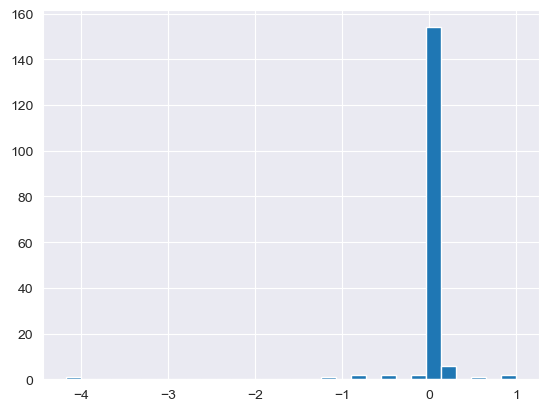

In [89]:
diffs[0].hist(bins=30)

<AxesSubplot:>

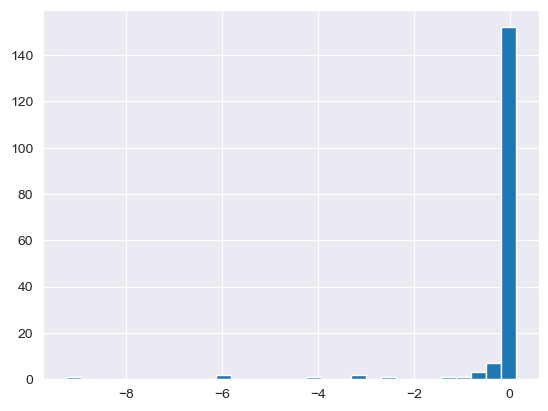

In [90]:
diffs[1].hist(bins=30)

<AxesSubplot:>

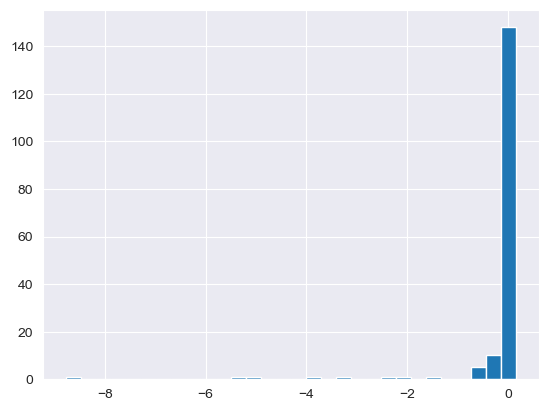

In [91]:
diffs[2].hist(bins=30)

<AxesSubplot:>

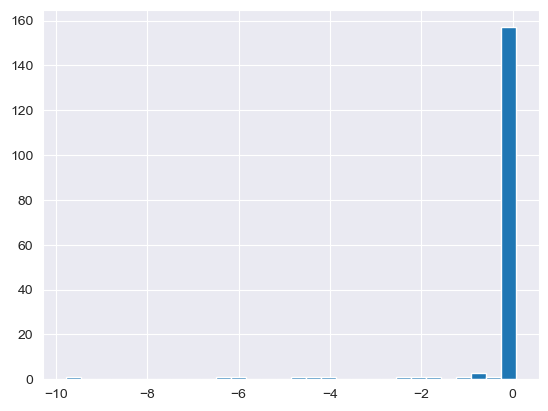

In [92]:
diffs[3].hist(bins=30)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 59.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

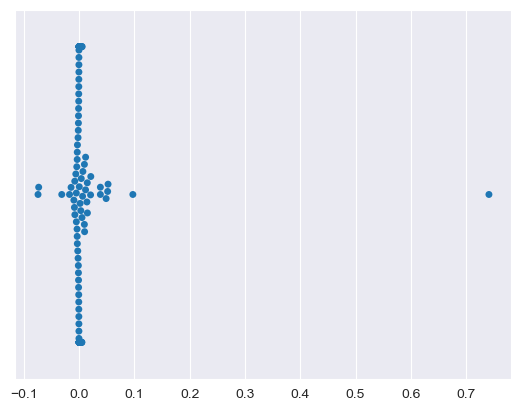

In [76]:
import seaborn as sns
sns.swarmplot(diffs)

In [191]:
import networkit as nk
g = nk.readGraph('~/Documents/GIRG_data/ca-erdos992.SpaceOne', nk.Format.EdgeListSpaceOne)

path expanded to: /Users/benjidayan/Documents/GIRG_data/ca-erdos992.SpaceOne


In [216]:
nk.globals.clustering(g)

0.27920611482671764

In [196]:
from benji_girgs import utils, generation
utils.LCC(g)

0.06833959351369637

In [199]:
df_clean.iloc[222].Info


{'tau': '8.902429112335973',
 'alpha': '1.4917545597575899',
 'const': '0.43518606491233985',
 'target_lcc': '0.2869365065578042',
 'fit_lcc': '0.27590549813254583',
 'fitting_time': '1.588066816329956',
 'hist': '[(2.0, 0.4563536871362807), (1.342281879194631, 0.21814470598453922), (1.6064257028112447, 0.3334491444454095), (1.462522851919561, 0.26882654390688787), (1.5311004784688993, 0.3262399027186659), (1.496026180458158, 0.29149656909580474), (1.4790848162699328, 0.2693042647442022), (1.4875072632190585, 0.28250673152088945), (1.4917545597575899, 0.2894553982454616), (1.489627883971953, 0.3026144358551203), (1.4917545597575899, 0.2894553982454616)]'}

In [203]:
g_out = generation.generate_GIRG_nk(4461, 1, 8.902, 1.49, const=0.43)[0]

/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/generation.py:160: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


In [204]:
nk.overview(g_out)

Network Properties:
nodes, edges			4461, 10166
directed?			False
weighted?			False
isolated nodes			60
self-loops			0
density				0.001022
clustering coefficient		0.287901
min/max/avg degree		0, 21, 4.557722
degree assortativity		0.328840
number of connected components	72
size of largest component	4376 (98.09 %)


In [186]:
info = df_clean.iloc[224].Info
info
# info['hist']

{'tau': '8.902429112335973',
 'alpha': '2.031101237702317',
 'const': '0.1638894187667534',
 'target_lcc': '0.2793798314948319',
 'fit_lcc': '0.31668548597237905',
 'fitting_time': '14.881464719772339',
 'hist': '[(2.0, 0.3139060192825502), (3.9215686274509802, 0.38695387822461563), (2.6490066225165565, 0.37205767393381395), (2.2792022792022792, 0.3400069486667246), (2.130492676431425, 0.3333188569443238), (2.0631850419084463, 0.3241118735342656), (2.031101237702317, 0.308998523408321), (2.0154306408439617, 0.3350994527924954), (2.0232355963012725, 0.3311908277599236), (2.0271607871085244, 0.32150612351255103), (2.031101237702317, 0.308998523408321)]'}

In [189]:
info = df_clean.iloc[221].Info
info
# info['hist']

{'n': '11390',
 'k': '1.3044165422776364',
 'gamma': '9.707211653293294',
 't': '0.433125',
 'target_lcc': '0.2865890732215756',
 'fit_lcc': '0.3803960740033006',
 'hist': '[(2.0202020202020203, 0.19523809523809518), (4.040404040404041, 0.4822222222222222), (2.6936026936026938, 0.45151515151515154), (2.308802308802309, 0.2592592592592593), (2.4864024864024867, 0.3606060606060606), (2.308802308802309, 0.2592592592592593)]'}

In [172]:
[df_clean.iloc[i].Info['fitting_time'] for i in [420, 421, 422]]

['125.94942450523376', '225.24509477615356', '893.8294241428375']

In [155]:
info = df_clean.iloc[581].Info
info
# info['hist']

{'n': '2619',
 'k': '1.4881588999236057',
 'gamma': '3.5097267779775976',
 't': '0.7347656249999999',
 'target_lcc': '0.13714930947624424',
 'fit_lcc': '0.14027620950230174',
 'hist': '[(2.0202020202020203, 0.38673673238947276), (1.3468013468013469, 0.13597672196647267), (1.6161616161616164, 0.23964214366368453), (1.4692378328741966, 0.20133761834448016), (1.4053579270970578, 0.1698080430817337), (1.375456694605631, 0.14887518457395987), (1.3609782030834665, 0.11308955094241292)]'}

In [296]:
graph_names = df_clean.Graph.unique()
bad_graph_names = []
for gn in graph_names:
    sub_df = df_clean.loc[(df_clean.Graph == gn) & (df_clean.Model.isin(['real-world', '1d-girg', '2d-girg', '3d-girg']))]
    coeffs = sub_df['Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].to_numpy()
    if coeffs.min() / coeffs.max() < 0.5:
        bad_graph_names.append(gn)


In [294]:
graph_names = df_clean.Graph.unique()
bad_graph_names = []
for gn in graph_names:
    real_df = df_clean.loc[(df_clean.Graph == gn) & (df_clean.Model == 'real-world')]
    one_d_df = df_clean.loc[(df_clean.Graph == gn) & (df_clean.Model == '1d-girg')]
    real_lcc = real_df['Centrality.ClusteringCoefficient.Location.Arithmetic Mean'].to_numpy()[0]
    target_lcc = float(one_d_df.Info.values[0]['target_lcc'])
    if min(real_lcc, target_lcc) / max(real_lcc, target_lcc) < 0.7:
        bad_graph_names.append(gn)


In [258]:
target

NameError: name 'target' is not defined

In [297]:
print(len(graph_names), len(bad_graph_names))

200 14


In [298]:
bad_graph_names

['rt-twitter-copen',
 'bio-dmela',
 'soc-LiveMocha',
 'socfb-nips-ego',
 'ia-dbpedia-team-bi',
 'tech-p2p-gnutella',
 'soc-douban',
 'ia-wiki-Talk',
 'rec-movielens-tag-movies-10m',
 'ca-IMDB',
 'ia-escorts-dynamic',
 'ia-reality',
 'rec-github',
 'inf-euroroad']

In [222]:
df_clean.loc[df_clean.Model.isin(['real-world', '1d-girg', '2d-girg', '3d-girg', 'hyperbolic']) & df_clean.Graph.isin(bad_graph_names), ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean', 'Centrality.Degree.Location.Arithmetic Mean']].sort_values(['Graph', 'Model'])

,Graph,Model,Type,Nodes,Edges,alpha,Centrality.ClusteringCoefficient.Location.Arithmetic Mean,Centrality.Degree.Location.Arithmetic Mean
33,bio-dmela,1d-girg,bio,7375,25717,1.0105894776318256,0.061084,6.974102
34,bio-dmela,2d-girg,bio,7382,25401,1.0140220232908184,0.060247,6.881875
35,bio-dmela,3d-girg,bio,7377,25706,1.0101010101010102,0.052927,6.969229
32,bio-dmela,hyperbolic,bio,4744,4986,None,0.014351,2.102024
27,bio-dmela,real-world,bio,7393,25569,None,0.011850,6.917084
222,ca-Erdos992,1d-girg,ca,4461,7186,1.4917545597575899,0.230801,3.221699
223,ca-Erdos992,2d-girg,ca,4419,7182,1.5299795305472965,0.234742,3.250509
224,ca-Erdos992,3d-girg,ca,4358,7143,2.031101237702317,0.269959,3.278109
221,ca-Erdos992,hyperbolic,ca,34,46,None,0.320588,2.705882
216,ca-Erdos992,real-world,ca,4991,7428,None,0.083525,2.976558


In [223]:
info = df_clean.iloc[573].Info
info
# info['hist']

{'tau': '4.522693545250537',
 'alpha': '1.5821024658550151',
 'const': '1.6363980337704853',
 'target_lcc': '0.3474333362286111',
 'fit_lcc': '0.3474333362286111',
 'fitting_time': '350.8872694969177',
 'hist': '[(2.0, 0.4935290541127421), (1.342281879194631, 0.2156258142968818), (1.6064257028112447, 0.3574654738122123), (1.462522851919561, 0.2904976982541475), (1.5311004784688993, 0.3224181360201511), (1.5678588926996568, 0.33874750282289584), (1.5869080089263574, 0.3559888821332407), (1.5773259396179913, 0.3458264570485538), (1.5821024658550151, 0.3480847737340398), (1.5797105920829349, 0.3511248154260401), (1.5821024658550151, 0.3480847737340398)]'}

In [136]:
df_real.loc[df_real.Graph.isin(bad_graph_names), ['Graph', 'Nodes']]

,Graph,Nodes
0,rt-twitter-copen,761
63,bio-diseasome,516
72,socfb-Caltech36,762
117,ca-Erdos992,4991
126,bio-yeast,1458
180,bio-celegans-dir,453
198,ca-netscience,379
243,soc-hamsterster,2000
315,socfb-nips-ego,2888
369,bn-macaque-rhesus_brain_1,241


In [92]:
info = df_clean.iloc[375].Info
info

{'tau': '2.604100935449141',
 'alpha': '1.0101010101010102',
 'const': '0.07791057985860345',
 'target_lcc': '0.656345001302875',
 'fit_lcc': '0.1828367931903066',
 'fitting_time': '1.1812002658843994',
 'hist': '[(2.0, 0.4251281160427343), (1.342281879194631, 0.38126465734387216), (1.1527377521613833, 0.22969686441414053), (1.0767160161507403, 0.21501780595848172), (1.0101010101010102, 0.1658994180491618)]'}

In [25]:
import seaborn as sns

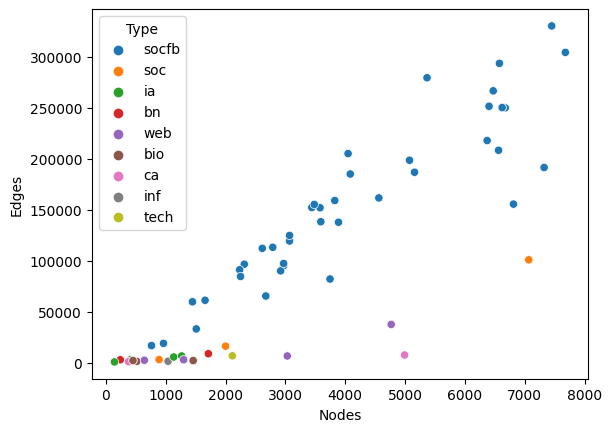

In [33]:
sns.scatterplot(x='Nodes', y='Edges', data=df_real, hue='Type')
plt.show()

In [53]:
df_clean_modsubset = df_clean.loc[df_clean.Model.isin(['real-world', 'chung-lu', 'hyperbolic', '1d-girg', '3d-girg'])]

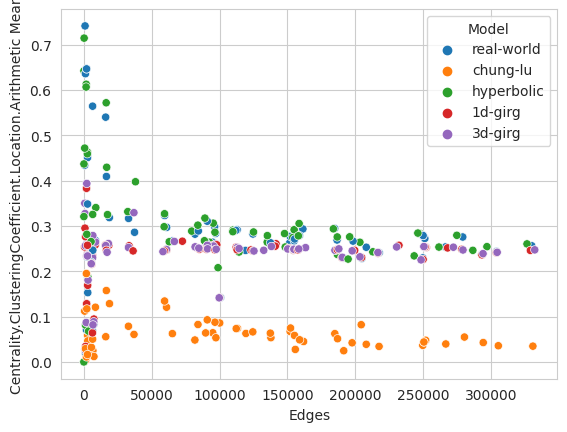

In [54]:
sns.scatterplot(x='Edges', y='Centrality.ClusteringCoefficient.Location.Arithmetic Mean', data=df_clean_modsubset, hue='Model')
plt.show()

In [63]:
CC = 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'

In [59]:
temp = df_clean_modsubset.sort_values(['Graph', 'Model']).loc[:, ['Graph', 'Model', 'Edges', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean']]
temp.head(20)

,Graph,Model,Edges,Centrality.ClusteringCoefficient.Location.Arithmetic Mean
666,bio-celegans,1d-girg,1976,0.383038
668,bio-celegans,3d-girg,2200,0.393607
664,bio-celegans,chung-lu,1880,0.194926
665,bio-celegans,hyperbolic,1683,0.606415
660,bio-celegans,real-world,2025,0.646463
523,bio-celegans-dir,1d-girg,1976,0.383038
525,bio-celegans-dir,3d-girg,2200,0.393607
521,bio-celegans-dir,chung-lu,1880,0.194926
522,bio-celegans-dir,hyperbolic,1749,0.612589
517,bio-celegans-dir,real-world,2025,0.646463


In [67]:
df_mini.loc[df_mini.Graph == 'bio-yeast']

,Graph,Model,Nodes,Edges,Info
159,bio-yeast,real-world,1458,1948,NaN
161,bio-yeast,ER,1333,1958,NaN
163,bio-yeast,BA circle,1458,1948,NaN
164,bio-yeast,BA full,1458,1948,NaN
166,bio-yeast,chung-lu,1090,1912,NaN
175,bio-yeast,hyperbolic,1117,1299,n=2619|k=1.4881588999236057|gamma=3.5097267779...
526,bio-yeast,1d-girg,1210,2088,tau=2.9848742153573937|alpha=1.216198502940622...
569,bio-yeast,2d-girg,1183,1886,tau=2.9848742153573937|alpha=1.218209034912959...
586,bio-yeast,3d-girg,1190,1762,tau=2.9848742153573937|alpha=1.190647662316176...
610,bio-yeast,4d-girg,1195,1921,tau=2.9848742153573937|alpha=1.271468827051778...


In [65]:
df.loc[526, 'Info']

'tau=2.9848742153573937|alpha=1.2161985029406228|const=0.009379502054907412|fit=False|target_lcc=0.07083049680177281|hist=[(1.3, 0.0869233995475262), (1.21, 0.06308578011143054), (1.2470588235294118, 0.07934482809704911), (1.2285294117647059, 0.07414259381607802), (1.2096757352941176, 0.07596798581818996), (1.1906476623161764, 0.07357763887208847), (1.171616259425464, 0.06032005926157338), (1.1806320569689255, 0.059610676592134426), (1.1911255673365813, 0.06240266684098817), (1.2034103579190385, 0.06752975874920675), (1.2178852455499798, 0.07344035069685631), (1.2106478017345093, 0.06552270185631895), (1.2142054074770923, 0.0659045487022762), (1.2181915984041534, 0.07132316111655816), (1.2161985029406228, 0.06903175462599452)]'

In [62]:
hist = get_hist(526)
hist

[(1.3, 0.0869233995475262),
 (1.21, 0.06308578011143054),
 (1.2470588235294118, 0.07934482809704911),
 (1.2285294117647059, 0.07414259381607802),
 (1.2096757352941176, 0.07596798581818996),
 (1.1906476623161764, 0.07357763887208847),
 (1.171616259425464, 0.06032005926157338),
 (1.1806320569689255, 0.059610676592134426),
 (1.1911255673365813, 0.06240266684098817),
 (1.2034103579190385, 0.06752975874920675),
 (1.2178852455499798, 0.07344035069685631),
 (1.2106478017345093, 0.06552270185631895),
 (1.2142054074770923, 0.0659045487022762),
 (1.2181915984041534, 0.07132316111655816),
 (1.2161985029406228, 0.06903175462599452)]

In [41]:
import glob
data_dir = '/cluster/scratch/bdayan/GIRG_data/'

graph_name_group_pairs = in_df[['Graph', 'Type']].to_numpy()
graph_dicts = []
for graph_name, group in graph_name_group_pairs:
    fn = glob.glob(data_dir + graph_name + '.*')[0]
    print(fn)
    graph_dict = {"Group": group, "FullPath": fn, "Name": graph_name}
    graph_dicts.append(graph_dict)

/cluster/scratch/bdayan/GIRG_data/ia-enron-only.SpaceOne
/cluster/scratch/bdayan/GIRG_data/bn-macaque-rhesus_brain_1.SpaceOne
/cluster/scratch/bdayan/GIRG_data/inf-USAir97.SpaceOne
/cluster/scratch/bdayan/GIRG_data/ca-netscience.SpaceOne
/cluster/scratch/bdayan/GIRG_data/ia-infect-dublin.SpaceOne
/cluster/scratch/bdayan/GIRG_data/bio-celegans.SpaceOne
/cluster/scratch/bdayan/GIRG_data/bio-celegans-dir.SpaceOne
/cluster/scratch/bdayan/GIRG_data/bio-diseasome.SpaceOne
/cluster/scratch/bdayan/GIRG_data/web-polblogs.SpaceOne
/cluster/scratch/bdayan/GIRG_data/rt-twitter-copen.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne
/cluster/scratch/bdayan/GIRG_data/soc-wiki-Vote.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/inf-euroroad.SpaceOne
/cluster/scratch/bdayan/GIRG_data/ia-email-univ.SpaceOne
/cluster/scratch/bdayan/GIRG_data/ia-fb-messages.SpaceOne
/cluster/scratch/bdayan/GIRG_data/web-google.SpaceOne
/cluster/scratch

In [42]:
graph_dicts_bn = [x for x in graph_dicts if x['Group'] == 'bn']
graph_dicts_bn

[{'Group': 'bn',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bn-macaque-rhesus_brain_1.SpaceOne',
  'Name': 'bn-macaque-rhesus_brain_1'},
 {'Group': 'bn',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bn-fly-drosophila_medulla_1.SpaceOne',
  'Name': 'bn-fly-drosophila_medulla_1'},
 {'Group': 'bn',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bn-human-BNU_1_0025889_session_2.SpaceOne',
  'Name': 'bn-human-BNU_1_0025889_session_2'},
 {'Group': 'bn',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bn-human-BNU_1_0025873_session_1-bg.SpaceOne',
  'Name': 'bn-human-BNU_1_0025873_session_1-bg'}]

In [43]:
import networkit as nk

g = nk.readGraph('/cluster/scratch/bdayan/GIRG_data/bio-yeast.SpaceOne', nk.Format.EdgeListSpaceOne)

In [44]:
g.numberOfNodes()

1827236

In [46]:
g = nk.readGraph('/cluster/scratch/bdayan/GIRG_data/bn-human-BNU_1_0025873_session_1-bg.SpaceOne', nk.Format.EdgeListSpaceOne)
g.numberOfNodes()

1827151

,Graph,Model,Type,Nodes,Info
1259,web-baidu-baike-related,real-world,web,372840,no info
1193,soc-twitter-follows,real-world,soc,404719,no info
821,rt-higgs,real-world,rt,424075,no info
1055,soc-dogster,real-world,soc,426485,no info
1109,soc-twitter-higgs,real-world,soc,456293,no info
905,soc-twitter-follows-mun,real-world,soc,465017,no info
755,soc-youtube,real-world,soc,495957,no info
929,soc-flickr,real-world,soc,513969,no info
701,soc-delicious,real-world,soc,536108,no info
1301,ca-coauthors-dblp,real-world,ca,540486,no info


In [49]:
in_df_mini.loc[in_df.Type == 'bn']

,Graph,Model,Type,Nodes,Info
827,bn-macaque-rhesus_brain_1,real-world,bn,242,no info
923,bn-fly-drosophila_medulla_1,real-world,bn,1770,no info
611,bn-human-BNU_1_0025889_session_2,real-world,bn,11382,no info
1079,bn-human-BNU_1_0025873_session_1-bg,real-world,bn,92043,no info


In [ ]:
alpha = 1.3
for _ in range(10):
    alpha = utils.scale_param()

In [39]:
df2 = pd.read_csv('/cluster/home/bdayan/girgs/nemo-eva/data-paper/3-cleaned_features/results.csv')

In [40]:
df2.shape

(1314, 243)

In [41]:
df2 = df2.loc[df2.Model == 'real-world']

In [42]:
df2 = df2.sort_values('Nodes')

In [43]:
df2.loc[:, ['Graph', 'Model', 'Nodes', 'Info']]

,Graph,Model,Nodes,Info
725,ia-enron-only,real-world,143,no info
827,bn-macaque-rhesus_brain_1,real-world,242,no info
59,inf-USAir97,real-world,332,no info
395,ca-netscience,real-world,379,no info
215,ia-infect-dublin,real-world,410,no info
...,...,...,...,...
83,web-BerkStan-dir,real-world,654782,no info
143,web-google-dir,real-world,855802,no info
179,ca-IMDB,real-world,896305,no info
1313,rt-retweet-crawl,real-world,1112702,no info


In [55]:
pairs

array([['ia-enron-only', 'ia'],
       ['bn-macaque-rhesus_brain_1', 'bn'],
       ['inf-USAir97', 'inf'],
       ['ca-netscience', 'ca'],
       ['ia-infect-dublin', 'ia'],
       ['bio-celegans', 'bio'],
       ['bio-celegans-dir', 'bio'],
       ['bio-diseasome', 'bio'],
       ['web-polblogs', 'web'],
       ['rt-twitter-copen', 'rt'],
       ['socfb-Caltech36', 'socfb'],
       ['soc-wiki-Vote', 'soc'],
       ['socfb-Reed98', 'socfb'],
       ['inf-euroroad', 'inf'],
       ['ia-email-univ', 'ia'],
       ['ia-fb-messages', 'ia'],
       ['web-google', 'web'],
       ['socfb-Haverford76', 'socfb'],
       ['bio-yeast', 'bio'],
       ['bio-yeast-protein-inter', 'bio'],
       ['socfb-Simmons81', 'socfb'],
       ['socfb-Swarthmore42', 'socfb'],
       ['bn-fly-drosophila_medulla_1', 'bn'],
       ['soc-hamsterster', 'soc'],
       ['tech-routers-rf', 'tech'],
       ['socfb-Amherst41', 'socfb'],
       ['socfb-Bowdoin47', 'socfb'],
       ['socfb-Hamilton46', 'socfb'],
       ['s

In [54]:
pairs = df2[['Graph', 'Type']].to_numpy()
for a, b in pairs:
    print(a, b)

ia-enron-only ia
bn-macaque-rhesus_brain_1 bn
inf-USAir97 inf
ca-netscience ca
ia-infect-dublin ia
bio-celegans bio
bio-celegans-dir bio
bio-diseasome bio
web-polblogs web
rt-twitter-copen rt
socfb-Caltech36 socfb
soc-wiki-Vote soc
socfb-Reed98 socfb
inf-euroroad inf
ia-email-univ ia
ia-fb-messages ia
web-google web
socfb-Haverford76 socfb
bio-yeast bio
bio-yeast-protein-inter bio
socfb-Simmons81 socfb
socfb-Swarthmore42 socfb
bn-fly-drosophila_medulla_1 bn
soc-hamsterster soc
tech-routers-rf tech
socfb-Amherst41 socfb
socfb-Bowdoin47 socfb
socfb-Hamilton46 socfb
socfb-Trinity100 socfb
socfb-USFCA72 socfb
socfb-Williams40 socfb
socfb-nips-ego socfb
inf-openflights inf
socfb-Oberlin44 socfb
socfb-Wellesley22 socfb
socfb-Smith60 socfb
web-edu web
socfb-Vassar85 socfb
socfb-Middlebury45 socfb
socfb-Pepperdine86 socfb
socfb-Colgate88 socfb
socfb-Santa74 socfb
socfb-Wesleyan43 socfb
socfb-Mich67 socfb
socfb-Bucknell39 socfb
socfb-Brandeis99 socfb
socfb-Howard90 socfb
socfb-Rice31 socfb
ca-G

In [46]:
for a, b in df2.loc[:, ['Graph', 'Model']].rows:
    print(a, b)

AttributeError: 'DataFrame' object has no attribute 'rows'